<a href="https://colab.research.google.com/github/Virajith26/Twitter-Bot-EDA-Mini-Project/blob/main/BI_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''

                                            ANUMULA VIRAJITH (19BDS0116)
                                            GONELLA S L SRAVYA (19BDS0140)

                        DIGITAL ASSIGNMENT - 1: EXPLORATORY DATA ANALYSIS ON TWITTER BOT ACTIVITY
                        
                                SUBJECT: BCD3002 - Business Intelligence and Analytics
                                
                                                SLOT: B1+B2+TB1+TB2
                                                
                                                FACULTY: ARUNKUMAR T


'''

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
data = pd.read_csv('twitter_human_bots_dataset.csv')
print(data.head())

   Unnamed: 0           created_at  default_profile  default_profile_image  \
0           0  2016-10-15 21:32:11            False                  False   
1           1  2016-11-09 05:01:30            False                  False   
2           2  2017-06-17 05:34:27            False                  False   
3           3  2016-07-21 13:32:25             True                  False   
4           4  2012-01-15 16:32:35            False                  False   

                                         description  favourites_count  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1  Photographing the American West since 1980. I ...               536   
2  Scruffy looking nerf herder and @twitch broadc...              3307   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...              8433   
4               Loan coach at @mancity & Aspiring DJ                88   

   followers_count  friends_count  geo_enabled                  id lang  \
0          

In [ ]:
data = data.iloc[:,1:20]
print(data.head())

            created_at  default_profile  default_profile_image  \
0  2016-10-15 21:32:11            False                  False   
1  2016-11-09 05:01:30            False                  False   
2  2017-06-17 05:34:27            False                  False   
3  2016-07-21 13:32:25             True                  False   
4  2012-01-15 16:32:35            False                  False   

                                         description  favourites_count  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1  Photographing the American West since 1980. I ...               536   
2  Scruffy looking nerf herder and @twitch broadc...              3307   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...              8433   
4               Loan coach at @mancity & Aspiring DJ                88   

   followers_count  friends_count  geo_enabled                  id lang  \
0             1589              4        False  787405734442958848   en   
1       

In [ ]:
print(data.describe(include = 'all'))

                 created_at default_profile default_profile_image description  \
count                 37438           37438                 37438       30182   
unique                37430               2                     2       29945   
top     2015-11-03 09:51:18           False                 False           .   
freq                      2           21718                 36880          14   
mean                    NaN             NaN                   NaN         NaN   
std                     NaN             NaN                   NaN         NaN   
min                     NaN             NaN                   NaN         NaN   
25%                     NaN             NaN                   NaN         NaN   
50%                     NaN             NaN                   NaN         NaN   
75%                     NaN             NaN                   NaN         NaN   
max                     NaN             NaN                   NaN         NaN   

        favourites_count  f

In [ ]:
'''
DATA TRANSFORMATION:
'''

In [ ]:
#convert boolean to 0 and 1s
def convert_0_1(data = pd.DataFrame, boolean_cols = list):
  for i in boolean_cols:
    data[i] = data[i].astype(int) 
    #astype() method is used to cast a pandas object to a specified dtype
  return data


def get_keys(data = pd.DataFrame, col = str):
  return data[col].unique().tolist()

In [ ]:
data = convert_0_1(data,["default_profile", "default_profile_image","geo_enabled", "verified"])
print(data.head())

            created_at  default_profile  default_profile_image  \
0  2016-10-15 21:32:11                0                      0   
1  2016-11-09 05:01:30                0                      0   
2  2017-06-17 05:34:27                0                      0   
3  2016-07-21 13:32:25                1                      0   
4  2012-01-15 16:32:35                0                      0   

                                         description  favourites_count  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1  Photographing the American West since 1980. I ...               536   
2  Scruffy looking nerf herder and @twitch broadc...              3307   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...              8433   
4               Loan coach at @mancity & Aspiring DJ                88   

   followers_count  friends_count  geo_enabled                  id lang  \
0             1589              4            0  787405734442958848   en   
1       

In [ ]:
'''
DATA CONVERSION
'''

In [ ]:
data['fav_log'] = np.round(np.log(1+data['favourites_count']),2)
data['friend_log'] = np.round(np.log(1+data['friends_count']),2)
data['follower_log'] = np.round(np.log(1+data['followers_count']),2)
data['total_tw_statuses_log'] = np.round(np.log(1 + data['statuses_count']),2)

data['network'] = np.round(data['friend_log'] * data['follower_log'], 3)
data['favs_log'] = np.round(np.log(1 + data['favourites_count']), 3)
print(data.head())

            created_at  default_profile  default_profile_image  \
0  2016-10-15 21:32:11                0                      0   
1  2016-11-09 05:01:30                0                      0   
2  2017-06-17 05:34:27                0                      0   
3  2016-07-21 13:32:25                1                      0   
4  2012-01-15 16:32:35                0                      0   

                                         description  favourites_count  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1  Photographing the American West since 1980. I ...               536   
2  Scruffy looking nerf herder and @twitch broadc...              3307   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...              8433   
4               Loan coach at @mancity & Aspiring DJ                88   

   followers_count  friends_count  geo_enabled                  id lang  ...  \
0             1589              4            0  787405734442958848   en  ...  

In [ ]:
'''
DATA VISUALIZATION:
'''

Text(0.5, 1.0, 'Relation between followers and total tweets sent')

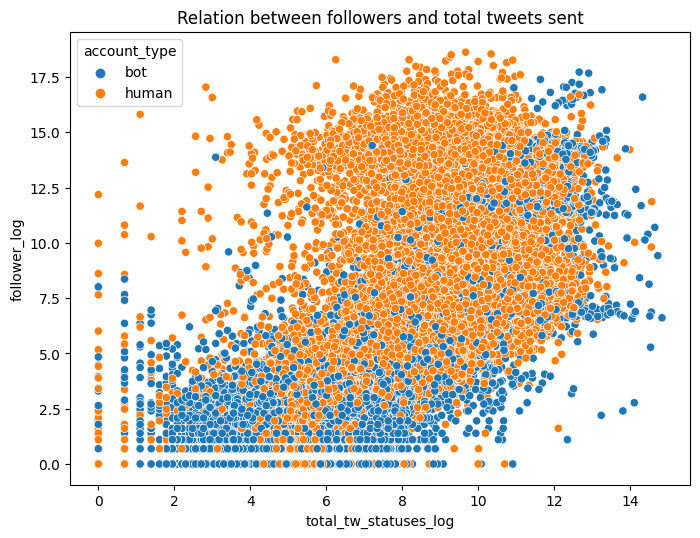

In [ ]:
plt.figure(figsize = (8,6),dpi = 100)
sns.scatterplot(y = data["follower_log"],x = data["total_tw_statuses_log"],hue = data["account_type"])
plt.title('Relation between followers and total tweets sent')

Text(0.5, 1.0, 'Relation between average tweets per day with respect to followers')

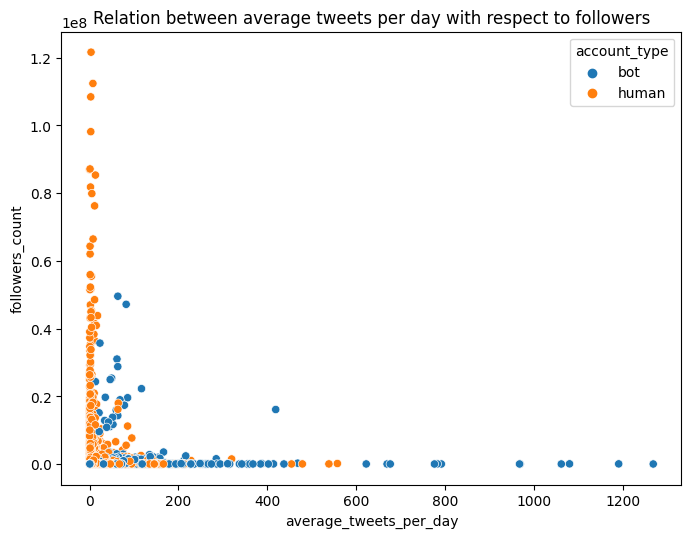

In [ ]:
plt.figure(figsize = (8,6),dpi = 100)
sns.scatterplot(y = data["followers_count"],x = data["average_tweets_per_day"],hue = data["account_type"])
plt.title('Relation between average tweets per day with respect to followers')

In [ ]:
'''
verified status:
'''

In [ ]:
len(data)

37438

In [ ]:
bot_ver =len( data.loc[(data["account_type"] == "bot")& (data["verified"] == True),["account_type","verified"]])
bot_ver

316

In [ ]:
bot_nver = len( data.loc[(data["account_type"] == "bot")& (data["verified"] == False),["account_type","verified"]])
bot_nver

12109

In [ ]:
human_ver = len(data.loc[(data["account_type"] == "human")& (data["verified"] == True),["account_type","verified"]])
human_ver

7235

In [ ]:
human_nver = len(data.loc[(data["account_type"] == "human")& (data["verified"] == False),["account_type","verified"]])
human_nver

17778

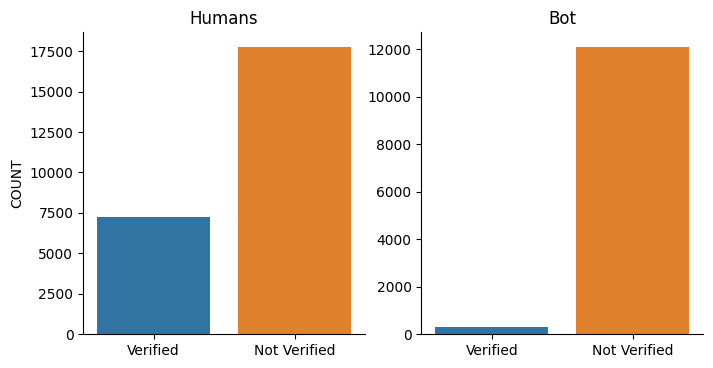

In [ ]:
plt.figure(figsize = (8,4),dpi = 100)
plt.subplot(1,2,1)
sns.barplot(x = ["Verified","Not Verified"],y = [human_ver,human_nver])
plt.title("Humans")
plt.ylabel("COUNT")
sns.despine()

plt.subplot(1,2,2)
sns.barplot(x = ["Verified","Not Verified"],y = [bot_ver,bot_nver])
plt.title("Bot")
#plt.ylabel("COUNT")
sns.despine()

In [ ]:
data_labels = get_keys(data,"account_type")
data_labels

['bot', 'human']

In [ ]:
'''
POPULARITY CALCULATION: 
'''

In [ ]:
def popularity(friend_index = int,followers_index = int):
  return np.round(np.log(1+friend_index)*np.log(1+followers_index),3)

def add_popularity(row):
  return popularity(friend_index = row["friends_count"],
                    followers_index=row["followers_count"])

In [ ]:
data["popularity_value"] = data.apply(add_popularity,axis = 1)
data["popularity_value"]

0        11.864
1        45.827
2        32.922
3        40.325
4        64.445
          ...  
37433    34.634
37434    89.249
37435    59.654
37436    25.255
37437     6.610
Name: popularity_value, Length: 37438, dtype: float64

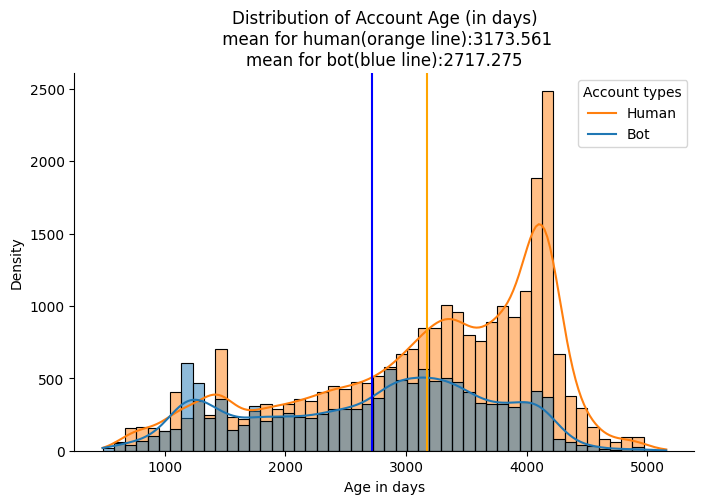

In [ ]:
plt.figure(figsize = (8,5),dpi = 100)

graph = sns.histplot(x = 'account_age_days',data = data,kde = True,
             common_bins = True,hue = "account_type")
mean_graph_h = round(float(np.mean(data.loc[(data['account_type'] =="human"),"account_age_days"])),3)
mean_graph_b = round(float(np.mean(data.loc[(data['account_type'] =="bot"),"account_age_days"])),3)
graph.axvline(mean_graph_h,color = 'orange')
graph.axvline(mean_graph_b,color = 'blue')
plt.legend(title='Account types',labels = ['Human','Bot'])
plt.title(f"Distribution of Account Age (in days)\n mean for human(orange line):{mean_graph_h}\nmean for bot(blue line):{mean_graph_b}")
#plt.title(f"Distribution of popularity among bot and humans\n mean for human:{mean_popul_h}\nmean for bot:{mean_popul_b}")
plt.xlabel('Age in days')
plt.ylabel('Density')
sns.despine()
plt.show()
plt.close()

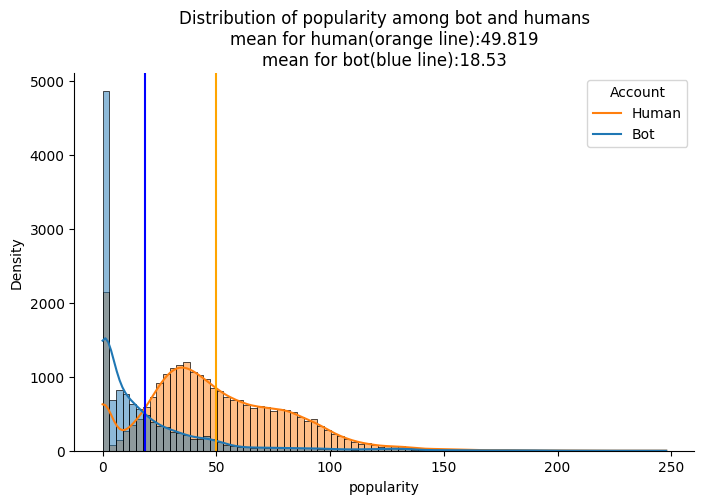

In [ ]:
#popularity
plt.figure(figsize = (8,5),dpi = 100)

graph = sns.histplot(x = 'popularity_value',data = data,kde = True,
             common_bins = True,hue = "account_type")
mean_graph_h = round(float(np.mean(data.loc[(data['account_type'] =="human"),"popularity_value"])),3)
mean_graph_b = round(float(np.mean(data.loc[(data['account_type'] =="bot"),"popularity_value"])),3)
graph.axvline(mean_graph_h,color = 'orange')
graph.axvline(mean_graph_b,color = 'blue')
plt.legend(title='Account',labels = ['Human','Bot'])
plt.title(f"Distribution of popularity among bot and humans\nmean for human(orange line):{mean_graph_h}\nmean for bot(blue line):{mean_graph_b}")
plt.xlabel('popularity')
plt.ylabel('Density')
sns.despine()
plt.show()


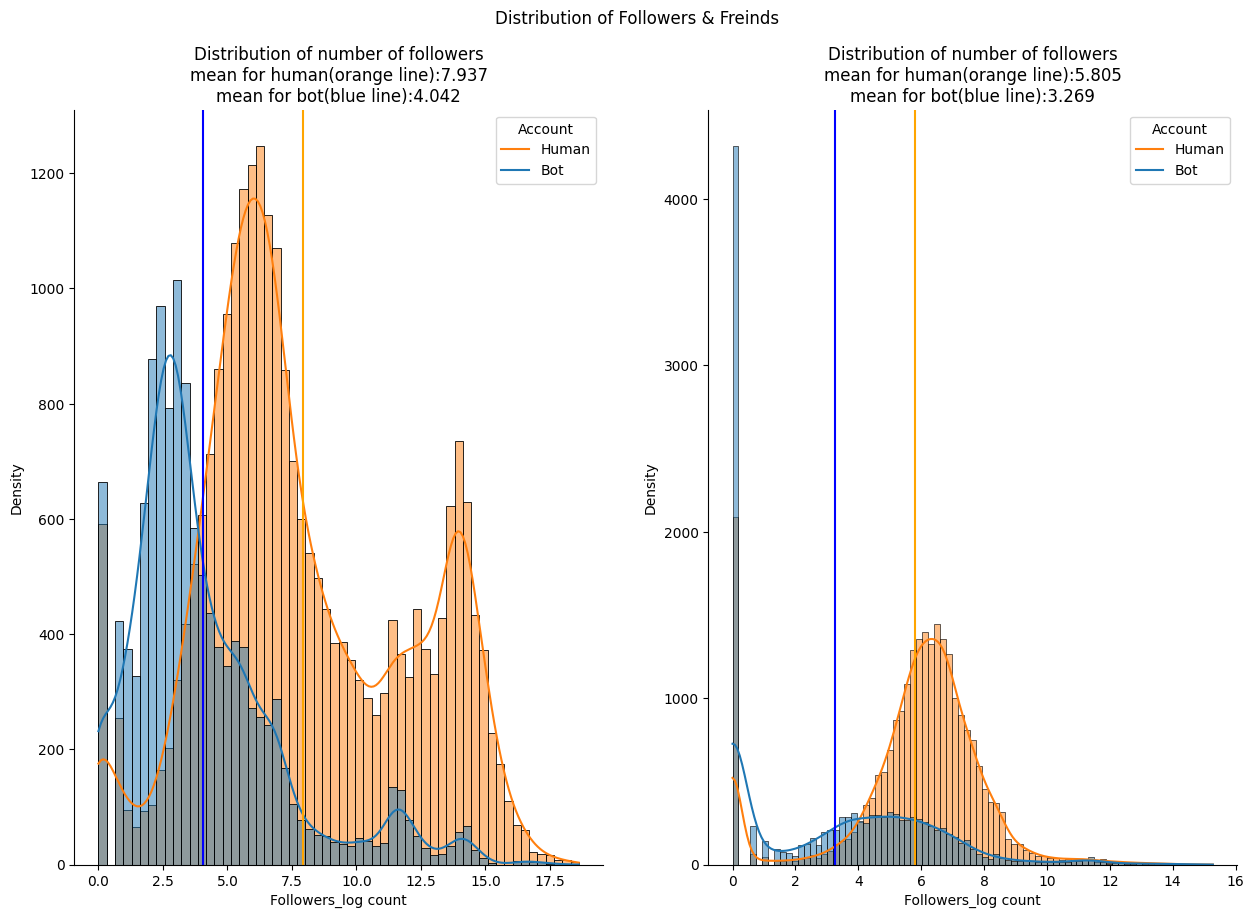

In [ ]:
plt.figure(figsize = (15,10),dpi = 100)
plt.suptitle('Distribution of Followers & Freinds')

plt.subplot(1,2,1)

graph = sns.histplot(x = 'follower_log',data = data,kde = True,
             common_bins = True,hue = "account_type")
mean_graph_h = round(float(np.mean(data.loc[(data['account_type'] =="human"),"follower_log"])),3)
mean_graph_b = round(float(np.mean(data.loc[(data['account_type'] =="bot"),"follower_log"])),3)
graph.axvline(mean_graph_h,color = 'orange')
graph.axvline(mean_graph_b,color = 'blue')
plt.legend(title='Account',labels = ['Human','Bot'])
plt.title(f"Distribution of number of followers\nmean for human(orange line):{mean_graph_h}\nmean for bot(blue line):{mean_graph_b}")
plt.xlabel('Followers_log count')
plt.ylabel('Density')
sns.despine()


plt.subplot(1,2,2)

graph = sns.histplot(x = 'friend_log',data = data,kde = True,
             common_bins = True,hue = "account_type")
mean_graph_h = round(float(np.mean(data.loc[(data['account_type'] =="human"),"friend_log"])),3)
mean_graph_b = round(float(np.mean(data.loc[(data['account_type'] =="bot"),"friend_log"])),3)
graph.axvline(mean_graph_h,color = 'orange')
graph.axvline(mean_graph_b,color = 'blue')
plt.legend(title='Account',labels = ['Human','Bot'])
plt.title(f"Distribution of number of followers\nmean for human(orange line):{mean_graph_h}\nmean for bot(blue line):{mean_graph_b}")
plt.xlabel('Followers_log count')
plt.ylabel('Density')
sns.despine()
plt.show()

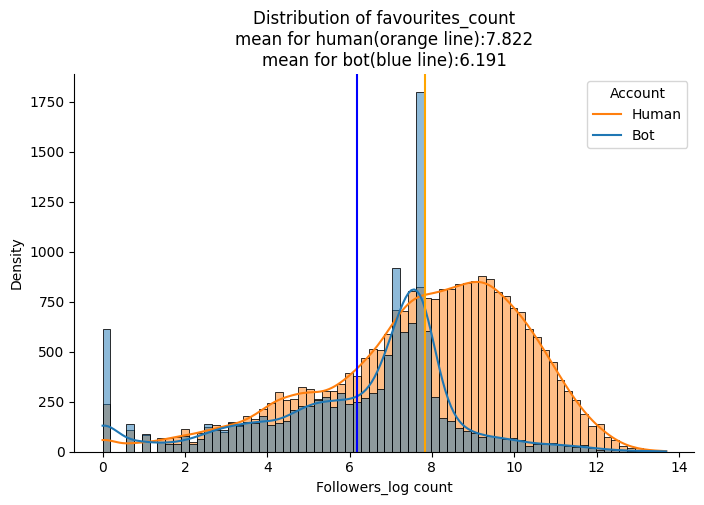

In [ ]:
plt.figure(figsize = (8,5),dpi = 100)
graph = sns.histplot(x = 'favs_log',data = data,kde = True,
             common_bins = True,hue = "account_type")
mean_graph_h = round(float(np.mean(data.loc[(data['account_type'] =="human"),"favs_log"])),3)
mean_graph_b = round(float(np.mean(data.loc[(data['account_type'] =="bot"),"favs_log"])),3)
graph.axvline(mean_graph_h,color = 'orange')
graph.axvline(mean_graph_b,color = 'blue')
plt.legend(title='Account',labels = ['Human','Bot'])
plt.title(f"Distribution of favourites_count\nmean for human(orange line):{mean_graph_h}\nmean for bot(blue line):{mean_graph_b}")
plt.xlabel('Followers_log count')
plt.ylabel('Density')
sns.despine()
plt.show()

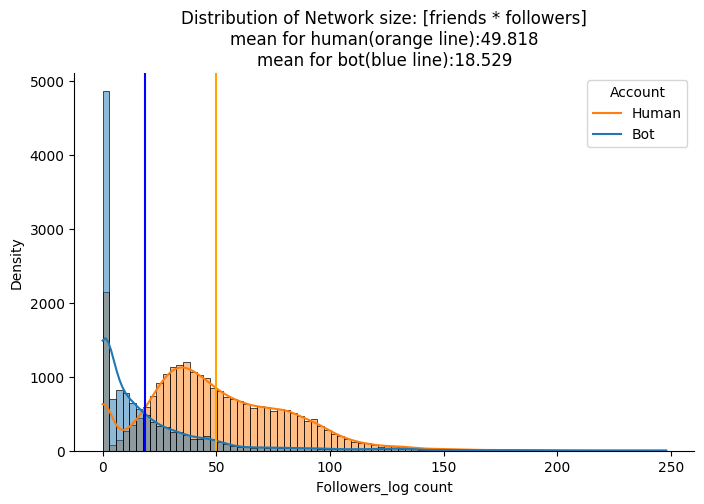

In [ ]:
plt.figure(figsize = (8,5),dpi = 100)
graph = sns.histplot(x = 'network',data = data,kde = True,
             common_bins = True,hue = "account_type")
mean_graph_h = round(float(np.mean(data.loc[(data['account_type'] =="human"),"network"])),3)
mean_graph_b = round(float(np.mean(data.loc[(data['account_type'] =="bot"),"network"])),3)
graph.axvline(mean_graph_h,color = 'orange')
graph.axvline(mean_graph_b,color = 'blue')
plt.legend(title='Account',labels = ['Human','Bot'])
plt.title(f"Distribution of Network size: [friends * followers]\nmean for human(orange line):{mean_graph_h}\nmean for bot(blue line):{mean_graph_b}")
plt.xlabel('Followers_log count')
plt.ylabel('Density')
sns.despine()
plt.show()